In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm

%matplotlib inline

from adic_graph import *

In [2]:
def visualize(graph, pos=None, node_size=550, edge_size=14, edge_label=True, undirected=True, font_size=15):
        
    if pos == None:
        pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / graph.n_nodes), np.sin(2 * np.pi * n / graph.n_nodes)]) for n in range(graph.n_nodes)}
    ax = plt.figure(figsize=(3*graph.length,3))
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2,
    }
    
    plt.subplots_adjust(wspace=0.4)
    
    for t in range(graph.length):
        plt.subplot(1, graph.length, t+1)
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t][i,j] > 0:
                            G.add_edge(str(i), str(j))
                        
                            # edge weight
                            if math.isclose(graph.w_list[t][i,j].item(), 0.5):    
                                pass
                                #edge_labels[(str(i), str(j))] = "1/2"
                            elif math.isclose(graph.w_list[t][i,j].item(), 2/3):
                                edge_labels[(str(i), str(j))] = "2/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/3):
                                edge_labels[(str(i), str(j))] = "1/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/5):
                                edge_labels[(str(i), str(j))] = "4/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/5):
                                edge_labels[(str(i), str(j))] = "1/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 8/9):
                                edge_labels[(str(i), str(j))] = "8/9"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/7):
                                edge_labels[(str(i), str(j))] = "4/7"
                            else:
                                edge_labels[(str(i), str(j))] = "??"
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")

        nx.draw(G, pos=pos, labels={str(i) : str(i) for i in range(graph.n_nodes)}, **options)
        
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

In [3]:
def is_finite_conv(g):
    init_x = torch.eye(g.n_nodes)
    for w in g.w_list:
        init_x = init_x.matmul(w)

    label = torch.ones((g.n_nodes, g.n_nodes)) / g.n_nodes
    if torch.norm(label - init_x) < 1e-5:
        return True
    return False

# n_powerの求め方に問題がある。

True

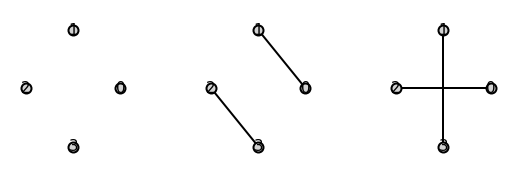

In [14]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(4, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

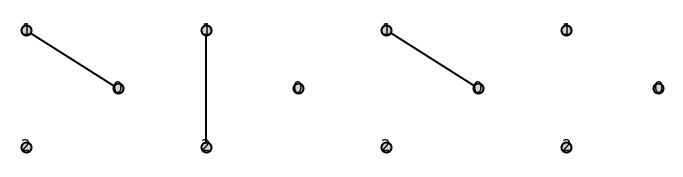

In [15]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(3, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

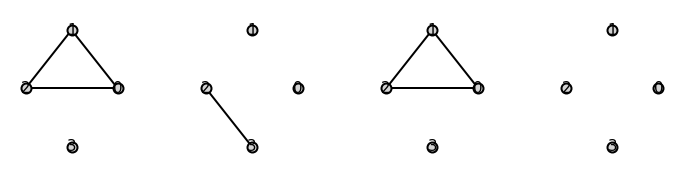

In [17]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(4, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

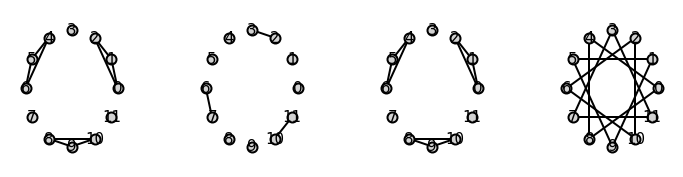

In [10]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(12, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

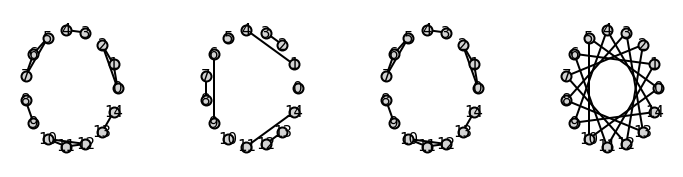

In [11]:
g = AdicGraph(15, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

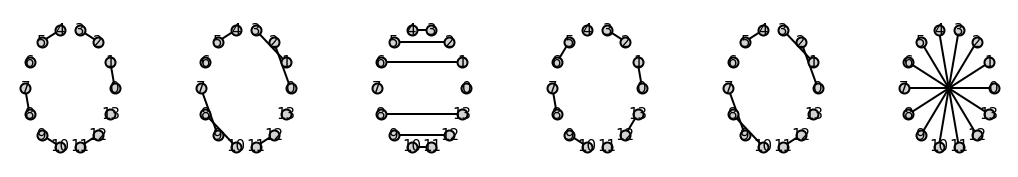

In [5]:
g = AdicGraph(14)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

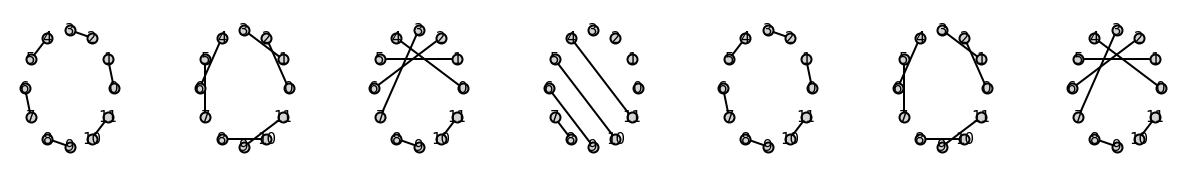

In [6]:
g = SimpleAdicGraph(12)
visualize(g, node_size=100, edge_label=False)

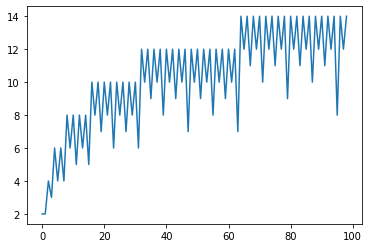

In [7]:
length = []
for n_nodes in range(1, 100):
    g = AdicGraph(n_nodes)
    length.append(len(g.w_list))
plt.plot(length)

100%|██████████| 49/49 [00:01<00:00, 29.32it/s] 


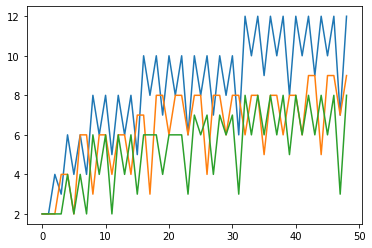

In [8]:
for max_degree in [1,2,3]:
    length = []
    for n_nodes in tqdm(range(1, 50)):
        g = AdicGraph(n_nodes, max_degree=max_degree)
        length.append(len(g.w_list))
    plt.plot(length, label=max_degree)

100%|██████████| 49/49 [00:00<00:00, 108.12it/s]


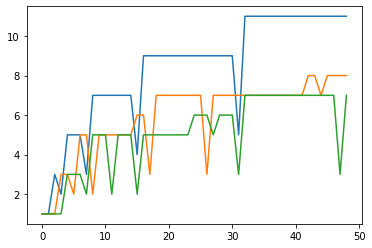

In [9]:
for max_degree in [1,2,3]:
    length = []
    for n_nodes in tqdm(range(1, 50)):
        g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
        length.append(len(g.w_list))
    plt.plot(length, label=max_degree)